In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

#Below kernel was helpful for this work. 
#https://www.kaggle.com/hamzakhan/transfer-learning-using-mobilenet

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("Garbage classification/TwoClassDataset/Train"))
print(os.listdir('Garbage classification/TwoClassDataset/Test'))

['Recyclable', 'Non-Recyclable']
['Recyclable', 'Non-Recyclable']


In [2]:
from __future__ import absolute_import, division, print_function
import os
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob, os, random
from tensorflow import keras

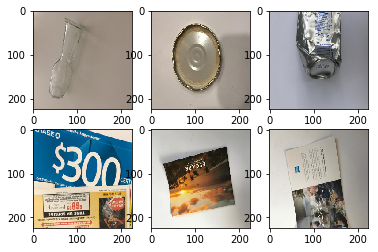

In [4]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
base_path = 'Garbage classification/TwoClassDataset/Train/'
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

for i, img_path in enumerate(random.sample(img_list, 6)):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img, dtype=np.uint8)

    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [5]:
train_base_path = 'Garbage classification/TwoClassDataset/Train/'
test_base_path = 'Garbage classification/TwoClassDataset/Test/'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    train_base_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = validation_datagen.flow_from_directory(
    train_base_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)


test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

test_generator = test_datagen.flow_from_directory(
    test_base_path,
    target_size=(224, 224),
    batch_size=30,
    class_mode='categorical',
    seed=0
)

Found 2248 images belonging to 2 classes.
Found 249 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [6]:
IMG_SHAPE = (224,224,3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

In [7]:
base_model.trainable = False

In [8]:
from tensorflow import keras
model = tf.keras.Sequential([
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(2, activation='sigmoid')
])

In [9]:
# model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), 
#               loss='categorical_crossentropy', 
#               metrics=['accuracy'])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [10]:
batch_size = 32
epochs = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit_generator(train_generator, 
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs, 
                              workers=4,
                              validation_data=validation_generator, 
                              validation_steps=validation_steps)

Epoch 1/10
70/70 [==============================] - 100s 1s/step - loss: 0.2202 - acc: 0.9429 - val_loss: 0.2116 - val_acc: 0.9464
Epoch 2/10
70/70 [==============================] - 89s 1s/step - loss: 0.1953 - acc: 0.9469 - val_loss: 0.1727 - val_acc: 0.9554
Epoch 3/10
70/70 [==============================] - 96s 1s/step - loss: 0.1539 - acc: 0.9540 - val_loss: 0.1666 - val_acc: 0.9554
Epoch 4/10
70/70 [==============================] - 93s 1s/step - loss: 0.1742 - acc: 0.9438 - val_loss: 0.1618 - val_acc: 0.9554
Epoch 5/10
70/70 [==============================] - 98s 1s/step - loss: 0.1584 - acc: 0.9429 - val_loss: 0.1544 - val_acc: 0.9554
Epoch 6/10
70/70 [==============================] - 95s 1s/step - loss: 0.1355 - acc: 0.9586 - val_loss: 0.1559 - val_acc: 0.9420
Epoch 7/10
70/70 [==============================] - 97s 1s/step - loss: 0.1364 - acc: 0.9554 - val_loss: 0.1462 - val_acc: 0.9554
Epoch 8/10
70/70 [==============================] - 97s 1s/step - loss: 0.1299 - acc: 0.9

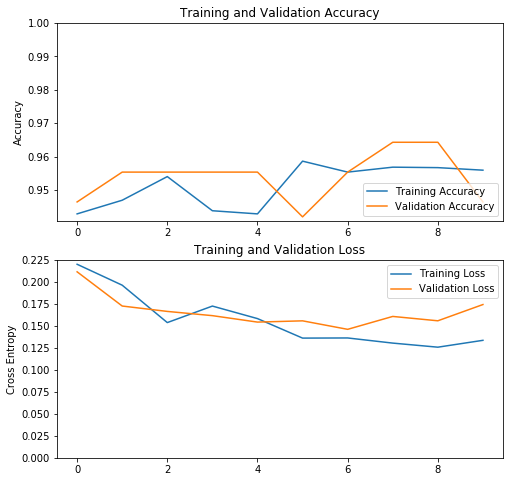

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [12]:
test_generator.reset()
test_pred = model.predict_generator(test_generator,verbose=1,steps=1)
test_eval = model.evaluate_generator(test_generator,verbose=1,steps=1)
print("%s%.2f  "% ("Loss     : ", test_eval[0]))
print("%s%.2f%s"% ("Accuracy : ", test_eval[1]*100, "%"))

1/1 [==============================] - 2s 2s/step - loss: 0.3205 - acc: 0.8833
Loss     : 0.32  
Accuracy : 88.33%


In [15]:
predicted_class_indices=np.argmax(test_pred,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results_sep_recyclable_v2_1.csv",index=False)

model.save('sep_recyclable_v2_1.h5')

# Test the model

In [16]:
from PIL import Image
img  = Image.open("Garbage classification/TwoClassDataset/Test/Non-Recyclable/trash133.jpg")

In [17]:
img = img.resize((224,224))
im2arr = np.array(img)

In [18]:
im2arr = im2arr.reshape(1,224,224,3)

In [19]:
y_pred = model.predict_classes(im2arr)

In [20]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
#predictions = [labels[k] for k in predicted_class_indices]

print("Prediction:", labels[y_pred[0]])

Prediction: Recyclable



# Saving Classes index

In [21]:
import pickle

In [22]:
with open('labels.p', 'wb') as fp:
    pickle.dump(labels, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [23]:
with open('labels.p', 'rb') as fp:
    data = pickle.load(fp)

In [24]:
data[y_pred[0]]

'Recyclable'

# Loading Saved Model

In [25]:
model1 = keras.models.load_model('sep_recyclable_v2_1.h5')

W1009 23:53:02.253158 140586471716608 hdf5_format.py:261] Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.


In [26]:
y_pred_2 = model1.predict_classes(im2arr)

In [27]:
data[y_pred_2[0]]

'Recyclable'